In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Question 1

In [2]:
df = pd.read_csv('train.csv')
df = df.drop(df[(df.label != 2) & (df.label != 7)].index)
df.loc[df['label'] == 7 , 'label'] = 1
df.loc[df['label'] == 2 , 'label'] = -1

### functions

In [3]:
def cost_function(x_train,y_train,w,b):
    [l,n] = x_train.shape
    cost = np.log(1+np.exp(-y_train*(b+np.dot(x_train,w))))
    return cost[0]

def mu(x_train,y_train,w,b):
    miu = 1/(1+np.exp(-y_train*(b+np.dot(x_train,w))))
    return miu


def grad_cost_w(x_train,y_train,w,b):
    [n,l] = x_train.shape
    grad_w = 0
    for i in range(n):
        grad_w += -1/n * y_train[i] * np.dot(x_train[i,:] , (1-mu(x_train[i,:],y_train[i],w,b)))
    return grad_w

def grad_cost_b(x_train,y_train,w,b):
    [n,l] = x_train.shape
    grad_b = 0
    for i in range(n):
        grad_b += -1/n * y_train[i] * (1-mu(x_train[i,:],y_train[i],w,b))
    return grad_b

In [4]:
x_train = np.zeros((len(df.axes[0]),len(df.axes[1])-1))
y_train = np.zeros(len(df.axes[0]))
x_test = np.zeros((857,len(df.axes[1])-1))
y_test = np.zeros(857)
dataset_array = df.to_numpy()
for i in range(len(df.axes[0])):
    if(i<7721):
        x_train[i,:] = dataset_array[i,1:]
        y_train[i] = dataset_array[i,0]
    if(i>=7721):
        x_test[i-7721,:] = dataset_array[i,1:]
        y_test[i-7721] = dataset_array[i,0]
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)


### Gradient decsent on train data

In [7]:
costs = np.zeros((3,200))
w_op = np.zeros((3,784))
b_op = np.zeros(3)
learning_rate = [1,0.1,0.01]
j = 0
for alpha in learning_rate:
    w = np.zeros(len(df.axes[1])-1)
    b=0
    for i in range(200):
        costs[j,i] = cost_function(x_train,y_train,w,b)
        w = w - alpha * grad_cost_w(x_train,y_train,w,b)
        b = b - alpha * grad_cost_b(x_train,y_train,w,b)
    w_op[j,:] = w
    b_op[j] = b
    j = j + 1
    



### Gradient decsent on test data

In [8]:
costs_t = np.zeros((3,200))
learning_rate = [1,0.1,0.01]
j = 0
for alpha in learning_rate:
    w = np.zeros(len(df.axes[1])-1)
    b=0
    for i in range(200):
        costs_t[j,i] = cost_function(x_test,y_test,w,b)
        w = w - alpha * grad_cost_w(x_test,y_test,w,b)
        b = b - alpha * grad_cost_b(x_test,y_test,w,b)
    j = j + 1


Text(0, 0.5, 'Cost')

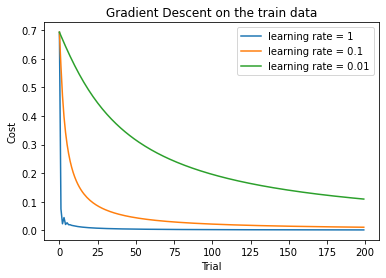

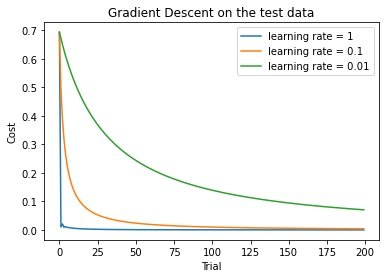

In [9]:
plt.figure(1)
plt.title("Gradient Descent on the train data")
plt.plot(costs[0,:],label = "learning rate = 1")
plt.plot(costs[1,:],label = "learning rate = 0.1")
plt.plot(costs[2,:],label = "learning rate = 0.01")
plt.legend()
plt.xlabel("Trial")
plt.ylabel("Cost")


plt.figure(2)
plt.title("Gradient Descent on the test data")
plt.plot(costs_t[0,:],label = "learning rate = 1")
plt.plot(costs_t[1,:],label = "learning rate = 0.1")
plt.plot(costs_t[2,:],label = "learning rate = 0.01")
plt.legend()
plt.xlabel("Trial")
plt.ylabel("Cost")

In [10]:
prediction = np.sign(b_op[0]+np.dot(x_train,w_op[0]))
correct_preds = np.sum(prediction == y_train)
correct_preds_percentage = correct_preds / len(y_train)
print("correct prediction percentage of the train data for learning rate = 1 :",correct_preds_percentage)

prediction = np.sign(b_op[1]+np.dot(x_train,w_op[1]))
correct_preds = np.sum(prediction == y_train)
correct_preds_percentage = correct_preds / len(y_train)
print("correct prediction percentage of the train data for learning rate = 0.1:",correct_preds_percentage)

prediction = np.sign(b_op[2]+np.dot(x_train,w_op[2]))
correct_preds = np.sum(prediction == y_train)
correct_preds_percentage = correct_preds / len(y_train)
print("correct prediction percentage of the train data for learning rate = 0.01:",correct_preds_percentage)

correct prediction percentage of the train data for learning rate = 1 : 0.8866868733970622
correct prediction percentage of the train data for learning rate = 0.1: 0.8782933084635113
correct prediction percentage of the train data for learning rate = 0.01: 0.8689671252040102


In [11]:
prediction = np.sign(b_op[0]+np.dot(x_test,w_op[0]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 1 :",correct_preds_percentage)

prediction = np.sign(b_op[1]+np.dot(x_test,w_op[1]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 0.1 :",correct_preds_percentage)

prediction = np.sign(b_op[2]+np.dot(x_test,w_op[2]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 0.01 :",correct_preds_percentage)

correct prediction percentage of the test data for learning rate = 1 : 0.9883313885647608
correct prediction percentage of the test data for learning rate = 0.1 : 0.9836639439906651
correct prediction percentage of the test data for learning rate = 0.01 : 0.9731621936989499


### Stochastic Gradient Decsent

#### packet = 1

In [12]:
costs = np.zeros((3,200))
w_op = np.zeros((3,784))
b_op = np.zeros(3)
learning_rate = [1,0.1,0.01]
j = 0
for alpha in learning_rate:
    w = np.zeros(len(df.axes[1])-1)
    b=0
    for i in range(200):
        
        costs[j,i] = cost_function(x_train,y_train,w,b)
        idx_sample = np.random.choice(784,1,replace=False)
        xsample = x_train[idx_sample,:]
        ysample = y_train[idx_sample]
        w = w - alpha * grad_cost_w(xsample,ysample,w,b)
        b = b - alpha * grad_cost_b(xsample,ysample,w,b)
    w_op[j] = w
    b_op[j] = b    
    j = j + 1



Text(0, 0.5, 'Cost')

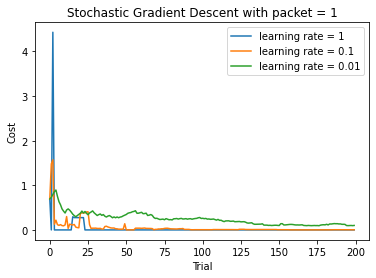

In [13]:
plt.figure(1)
plt.title("Stochastic Gradient Descent with packet = 1")
plt.plot(costs[0,:],label = "learning rate = 1")
plt.plot(costs[1,:],label = "learning rate = 0.1")
plt.plot(costs[2,:],label = "learning rate = 0.01")
plt.legend()
plt.xlabel("Trial")
plt.ylabel("Cost")

In [14]:
prediction = np.sign(b_op[0]+np.dot(x_test,w_op[0]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 1 :",correct_preds_percentage)

prediction = np.sign(b_op[1]+np.dot(x_test,w_op[1]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 0.1:",correct_preds_percentage)

prediction = np.sign(b_op[2]+np.dot(x_test,w_op[2]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 0.01: ",correct_preds_percentage)

correct prediction percentage of the test data for learning rate = 1 : 0.9544924154025671
correct prediction percentage of the test data for learning rate = 0.1: 0.969661610268378
correct prediction percentage of the test data for learning rate = 0.01:  0.969661610268378


#### packet = 100

In [21]:
costs = np.zeros((3,200))
w_op = np.zeros((3,784))
b_op = np.zeros(3)
learning_rate = [1,0.1,0.01]
j = 0
for alpha in learning_rate:
    w = np.zeros(len(df.axes[1])-1)
    b=0
    for i in range(200):
        
        costs[j,i] = cost_function(x_train,y_train,w,b)
        idx_sample = np.random.choice(784,100,replace=False)
        xsample = x_train[idx_sample,:]
        ysample = y_train[idx_sample]
        w = w - alpha * grad_cost_w(xsample,ysample,w,b)
        b = b - alpha * grad_cost_b(xsample,ysample,w,b)

    w_op[j] = w
    b_op[j] = b       
    j = j + 1


Text(0, 0.5, 'Cost')

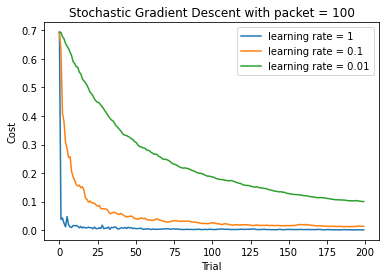

In [22]:
plt.figure(2)
plt.title("Stochastic Gradient Descent with packet = 100")
plt.plot(costs[0,:],label = "learning rate = 1")
plt.plot(costs[1,:],label = "learning rate = 0.1")
plt.plot(costs[2,:],label = "learning rate = 0.01")
plt.legend()
plt.xlabel("Trial")
plt.ylabel("Cost")

In [23]:
prediction = np.sign(b_op[0]+np.dot(x_test,w_op[0]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 1 :",correct_preds_percentage)

prediction = np.sign(b_op[0]+np.dot(x_test,w_op[1]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 0.1 :",correct_preds_percentage)

prediction = np.sign(b_op[0]+np.dot(x_test,w_op[2]))
correct_preds = np.sum(prediction == y_test)
correct_preds_percentage = correct_preds / len(y_test)
print("correct prediction percentage of the test data for learning rate = 0.01 :",correct_preds_percentage)

correct prediction percentage of the test data for learning rate = 1 : 0.9883313885647608
correct prediction percentage of the test data for learning rate = 0.1 : 0.9848308051341891
correct prediction percentage of the test data for learning rate = 0.01 : 0.9754959159859977


# Question 2

In [2]:
def f(x1,x2):
    f = 2*x1**2 + 2*x2**2 - 17*x2*np.cos(0.2*np.pi*x1) - x1*x2
    return f

def gradf(x1,x2):
    grad_f = np.array([[4*x1 + 3.4*np.pi*x2*np.sin(0.2*np.pi*x1)-x2,4*x2-17*np.cos(0.2*x1*np.pi)-x1]])
    return grad_f

def hessian_matrix(x1,x2):
    hess = np.array([[4 + 0.68*x2*np.pi**2*np.cos(0.2*np.pi*x1),3.4*np.pi*np.sin(0.2*np.pi*x1)-1],[3.4*np.pi*np.sin(0.2*np.pi*x1)-1,4]])
    return hess


In [27]:
x1 = 1
x2 = 3
x = np.array([[x1],[x2]])
for i in range(1000):
    x = x - np.dot(np.linalg.inv(hessian_matrix(x[0,0],x[1,0])),gradf(x[0,0],x[1,0]).T)
print(x)
f(x[0,0],x[1,0])

[[0.13087466]
 [4.26835765]]


-36.40349774185023

In [31]:
x_1 = np.linspace(-4.5,4.5,19).reshape(19,1)
x_2 = np.linspace(0.5,9.5,19).reshape(19,1)
group_close_m = []
group_close_n = []
group_far_m = []
group_far_n = []
group_farther_m = []
group_farther_n = []
final_value = np.zeros((361,))
count = 0
for m in x_1:
    for n in x_2:
        x = np.array([m,n])
        for i in range(100):
            x = x - np.dot(np.linalg.inv(hessian_matrix(x[0,0],x[1,0])),gradf(x[0,0],x[1,0]).T)
        final_value[count] = f(x[0,0],x[1,0])
        if(final_value[count] + 36.4 < 10 ):
            group_close_m = np.append(group_close_m,m)
            group_close_n = np.append(group_close_n,n)
        if((10 < final_value[count] + 36.4) & (final_value[count] + 36.4 < 50)):
            group_far_m = np.append(group_far_m,m)
            group_far_n = np.append(group_far_n,n)
        if(50 < final_value[count] + 36.4):
            group_farther_m = np.append(group_farther_m,m)
            group_farther_n = np.append(group_farther_n,n)
        count = count + 1

group_close_m = np.array(group_close_m)
group_close_n = np.array(group_close_n)
group_far_m = np.array(group_far_m)
group_far_n = np.array(group_far_n)
group_farther_m = np.array(group_farther_m)
group_farther_n = np.array(group_farther_n)

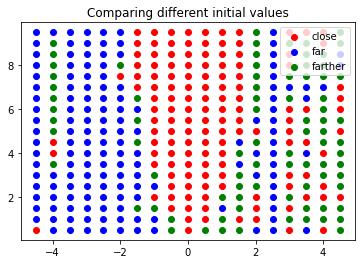

In [35]:
count = 0
labels = {'close','far','farther'}
plt.figure(1)
plt.title("Comparing different initial values")
plt.scatter(group_close_m,group_close_n,color='red')
plt.scatter(group_far_m,group_far_n,color='blue')
plt.scatter(group_farther_m,group_farther_n,color='green')  
plt.legend(['close','far','farther'])

#### Genetic Algorithm

In [32]:
def selection(x_1,x_2):
    N = len(x_1)
    l = 10
    selected_x1x2 = np.zeros((N,2))
    mat_temp = np.zeros((l,l))
    for i in range(N):
        x_1_temp = np.random.choice(x_1,l)
        x_2_temp = np.random.choice(x_2,l)
        for j in range(l):
            mat_temp[j,:] = f(x_1_temp[j],x_2_temp) 
        [x1_min,x2_min] = np.where(mat_temp == np.min(mat_temp))
        selected_x1x2[i,:] = [x_1_temp[x1_min[0]],x_2_temp[x2_min[0]]]

    return selected_x1x2

def decimalToBinary(n):
    return '{0:08b}'.format(int(n))

def BinarytoDecimal(n):
    n1 = int(n,2)
    return n1

def crossover(selected_x1x2):
    [n,l] = selected_x1x2.shape
    random_selected_x1x2 = np.zeros((n,l))
    pt = 3
    idx = np.arange(n)
    idx_list = idx.tolist()
    random.shuffle(idx_list)
    j = 0
    for i in range(int(n/2)):
        pair1_idx = idx_list[i]
        pair2_idx = idx_list[i+1]
        [pair1x1,pair1x2] = selected_x1x2[pair1_idx,:]
        [pair2x1,pair2x2] = selected_x1x2[pair2_idx,:]
        pair1x1_b = decimalToBinary(pair1x1)
        pair1x2_b = decimalToBinary(pair1x2)
        pair2x1_b = decimalToBinary(pair2x1)
        pair2x2_b = decimalToBinary(pair2x2)
        c1 = pair1x1_b[:pt] + pair2x1_b[pt:]
        c2 = pair2x1_b[:pt] + pair1x1_b[pt:]
        d1 = pair1x2_b[:pt] + pair2x2_b[pt:]
        d2 = pair2x2_b[:pt] + pair1x2_b[pt:]
        pair1x1_int = BinarytoDecimal(c1)
        pair2x1_int = BinarytoDecimal(c2)
        pair1x2_int = BinarytoDecimal(d1)
        pair2x2_int = BinarytoDecimal(d2)
        random_selected_x1x2[j,:] = [pair1x1_int,pair1x2_int]
        random_selected_x1x2[j+1,:] = [pair2x1_int,pair2x2_int]
        j=j+2
    return random_selected_x1x2


def mutation(cross_selected_x1x2,A,B,r):
    [n,l] = cross_selected_x1x2.shape
    idx = np.arange(n)
    p = np.random.uniform(0,1)
    if(p<r):
        selected_for_mutation = np.random.choice(idx,A,replace=False)
        for i in range(A):
            [x1,x2] = cross_selected_x1x2[selected_for_mutation[i],:]
            x1b = decimalToBinary(x1)
            x2b = decimalToBinary(x2)
            newx1b = list(x1b)
            newx2b = list(x2b)
            sel_bits = np.random.choice((1,2,3,4,5,6,7),B,replace=False)
            for j in sel_bits:
                newx1b[j] = str(1 - int(newx1b[j]))
                newx2b[j] = str(1 - int(newx2b[j]))
            x1b = ''.join(newx1b)
            x2b = ''.join(newx2b)
            x1n = BinarytoDecimal(x1b)
            x2n = BinarytoDecimal(x2b) 
            cross_selected_x1x2[selected_for_mutation[i],:] = [x1n,x2n]
    
    return cross_selected_x1x2

In [39]:

def genetic_algorithm(Population,Iter,No_mut,No_bits,Prob_mut):
    
    x_1_f = np.linspace(-15,15,255)
    x_2_f = np.linspace(-15,15,255)
    x_1 = np.random.choice(x_1_f,Population)
    x_2 = np.random.choice(x_2_f,Population)
    
    for i in range(Iter):
        selected_x1x2 = selection(x_1,x_2) 
        cross_selected_x1x2 = crossover(selected_x1x2 * 254 / 30)
        mut_selected_x1x2 = mutation(cross_selected_x1x2,No_mut,No_bits,Prob_mut)
        x_1 = mut_selected_x1x2[:,0] / 254 * 30
        x_2 = mut_selected_x1x2[:,1] / 254 * 30
    print("argmin x1: ",selected_x1x2[0,0])
    print("argmin x2: ",selected_x1x2[0,1])
    print("The minimum of this function is: ",f(selected_x1x2[0,0],selected_x1x2[0,1]))


In [46]:
genetic_algorithm(1000,100,700,7,1)

argmin x1:  0.11811023622047244
argmin x2:  4.251968503937007
The minimum of this function is:  -36.40034296457406


# Question 3

In [2]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from mlxtend.plotting import plot_decision_regions

In [4]:
iris = datasets.load_iris()
data = iris.data[:, :2] #data
label = iris.target #label

In [5]:
# print the names of the 13 features
print("Features: ", iris.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", iris.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [11]:
clf = svm.SVC(kernel='linear')
ovr = OneVsRestClassifier(clf)
# fit model
ovr.fit(data, label)
# make predictions
yhat = ovr.predict(data)


In [7]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(label, yhat))

Accuracy: 0.7866666666666666


<AxesSubplot:>

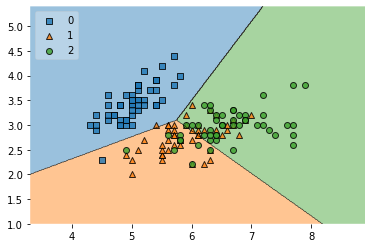

In [12]:
plot_decision_regions(data, label, clf=ovr, legend=2)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label, yhat)

array([[49,  1,  0],
       [ 1, 28, 21],
       [ 0,  9, 41]], dtype=int64)

In [18]:
confidence_matrix = confusion_matrix(label, yhat)/np.sum(confusion_matrix(label, yhat),axis=0)
confidence_matrix

array([[0.98      , 0.02631579, 0.        ],
       [0.02      , 0.73684211, 0.33870968],
       [0.        , 0.23684211, 0.66129032]])